In [ ]:
# importing libraries
import pandas as pd
import numpy as np

from google.colab import files

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("/content/drive/My Drive/iqb/all_features.csv") 

In [ ]:
df.columns

Index(['Unnamed: 0', 'Song_Name', 'onset_strength', 'chroma_stft',
       'chroma_cqt', 'chroma_cens', 'melspectrogram', 'mfcc',
       'spectral_centroid', 'spectral_bandwidth', 'spectral_contrast',
       'spectral_rolloff', 'tonnetz', 'zero_crossing_rate', 'labels'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,Song_Name,onset_strength,chroma_stft,chroma_cqt,chroma_cens,melspectrogram,mfcc,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,tonnetz,zero_crossing_rate,labels
0,0,Aditi Singh Sharma - High Rated Gabru (Female ...,1.558583,0.399325,0.501640,0.249157,7.062729,-1.811182,2512.244015,2745.921532,21.380764,5197.796266,0.015492,0.054281,0
1,1,Amaal Mallik - Zero Hour Mashup 2015(Remix By ...,1.370409,0.422881,0.475017,0.241708,18.979590,4.403271,2641.350377,3498.785676,20.644559,6072.479538,0.014796,0.042882,0
2,2,Anirudh Ravichander - Pori Pathi Vizhum.mp3,1.475866,0.409791,0.491423,0.249568,7.932009,0.533828,3406.636170,3659.061440,20.396372,7632.464878,0.008711,0.068220,0
3,3,Badshah - Proper Patola.mp3,1.595038,0.422150,0.485531,0.252525,12.572222,-1.048275,3269.611281,3610.420577,20.391510,7358.119696,-0.014358,0.066408,0
4,4,Badshah - She Move It Like.mp3,1.620642,0.483835,0.365514,0.223681,14.925961,1.051512,2836.057656,3116.927351,21.290714,6203.393641,0.050846,0.056044,0


In [ ]:
df.corr()

,Unnamed: 0,onset_strength,chroma_stft,chroma_cqt,chroma_cens,melspectrogram,mfcc,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,tonnetz,zero_crossing_rate,labels
Unnamed: 0,1.000000,-0.134453,-0.329427,0.360360,0.288172,0.148096,0.153623,0.158121,0.258346,-0.003908,0.157040,0.017011,0.059414,0.988149
onset_strength,-0.134453,1.000000,0.306147,0.560118,0.616692,0.256602,0.162230,0.443019,0.229908,-0.252082,0.365593,-0.024568,0.494943,-0.126809
chroma_stft,-0.329427,0.306147,1.000000,0.080732,0.048343,0.370628,0.490240,0.211048,0.228432,-0.478723,0.258764,0.023690,0.051075,-0.288654
chroma_cqt,0.360360,0.560118,0.080732,1.000000,0.958787,0.228904,0.218057,0.464607,0.340452,-0.371778,0.401088,-0.070887,0.493546,0.357206
chroma_cens,0.288172,0.616692,0.048343,0.958787,1.000000,0.180268,0.163795,0.427986,0.283961,-0.287351,0.354862,-0.085649,0.491139,0.279969
melspectrogram,0.148096,0.256602,0.370628,0.228904,0.180268,1.000000,0.740597,0.262917,0.308028,-0.497796,0.283500,0.055276,0.088251,0.176078
mfcc,0.153623,0.162230,0.490240,0.218057,0.163795,0.740597,1.000000,0.342768,0.454280,-0.300024,0.409550,0.047735,0.104698,0.182927
spectral_centroid,0.158121,0.443019,0.211048,0.464607,0.427986,0.262917,0.342768,1.000000,0.880440,-0.187830,0.977982,-0.010567,0.870795,0.176022
spectral_bandwidth,0.258346,0.229908,0.228432,0.340452,0.283961,0.308028,0.454280,0.880440,1.000000,-0.178400,0.923046,0.030937,0.563755,0.281635
spectral_contrast,-0.003908,-0.252082,-0.478723,-0.371778,-0.287351,-0.497796,-0.300024,-0.187830,-0.178400,1.000000,-0.178915,0.031689,-0.102621,-0.027069


In [ ]:
def get_data(df):

  # shuffle the DataFrame rows 
  df = df.sample(frac = 1)

  col = list(df.columns)
  X = df[col[2:-1]]
  X = X.to_numpy()
    
  y = df["labels"].to_numpy().flatten()

  return X, y
  


tSNE

In [ ]:
X, y = get_data(df)

In [ ]:
X_pandas = pd.DataFrame(X)
X_pandas.columns = df.columns[2:-1]

y_pandas = pd.DataFrame(y)
y_pandas.columns = ['labels']

In [ ]:
from sklearn.manifold import TSNE

tsne_em = TSNE(n_components=3, perplexity=30.0, n_iter=1000, verbose=1)
tsne_results = tsne_em.fit_transform(X_pandas)

tsne_pandas = y_pandas
tsne_pandas['tsne-3d-one'] = tsne_results[:,0]
tsne_pandas['tsne-3d-two'] = tsne_results[:,1]
tsne_pandas['tsne-3d-three'] = tsne_results[:,2]

tsne_pandas

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 596 samples in 0.001s...
[t-SNE] Computed neighbors for 596 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 596 / 596
[t-SNE] Mean sigma: 101.645687
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.243137
[t-SNE] KL divergence after 1000 iterations: 0.458635


,labels,tsne-3d-one,tsne-3d-two,tsne-3d-three
0,0,6.136411,-6.762595,-1.358597
1,6,7.151896,-3.635437,-3.689975
2,2,-8.921165,4.601810,9.995353
3,3,6.171943,0.167698,10.208938
4,6,-9.873730,1.446516,-2.822065
...,...,...,...,...
591,4,9.172963,-1.676220,-0.788840
592,1,-9.772893,2.861116,-3.070580
593,4,-6.043415,3.746184,-4.602544
594,5,-6.176363,5.743981,-0.469132


In [ ]:
# removing outliers
from scipy import stats

tsne_pandas = tsne_pandas[(np.abs(stats.zscore(tsne_pandas)) < 3).all(axis=1)]

In [ ]:
import plotly.express as px

fig = px.scatter_3d(tsne_pandas, x='tsne-3d-one', y='tsne-3d-two', z='tsne-3d-three', color='labels', 
                    size=[1]*591, opacity=0.7)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

3d visualization of 3 most important features

In [ ]:
# 3 most important features are  (graph is below) --- "chroma_cqt", "chroma_cens", "onset_strength"

In [ ]:
# removing outliers
from scipy import stats

df_new = df[df.columns[2:]]

df_new = df_new[(np.abs(stats.zscore(df_new)) < 3).all(axis=1)]
df_new.shape

(545, 13)

In [ ]:
df_new

,onset_strength,chroma_stft,chroma_cqt,chroma_cens,melspectrogram,mfcc,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,tonnetz,zero_crossing_rate,labels
0,1.558583,0.399325,0.501640,0.249157,7.062729,-1.811182,2512.244015,2745.921532,21.380764,5197.796266,0.015492,0.054281,0
1,1.370409,0.422881,0.475017,0.241708,18.979590,4.403271,2641.350377,3498.785676,20.644559,6072.479538,0.014796,0.042882,0
2,1.475866,0.409791,0.491423,0.249568,7.932009,0.533828,3406.636170,3659.061440,20.396372,7632.464878,0.008711,0.068220,0
3,1.595038,0.422150,0.485531,0.252525,12.572222,-1.048275,3269.611281,3610.420577,20.391510,7358.119696,-0.014358,0.066408,0
4,1.620642,0.483835,0.365514,0.223681,14.925961,1.051512,2836.057656,3116.927351,21.290714,6203.393641,0.050846,0.056044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,1.591050,0.353180,0.590676,0.271198,17.412110,3.946991,4094.888253,3887.146593,20.278644,8584.351048,0.000107,0.096155,6
592,1.745647,0.387994,0.603282,0.276680,13.986808,0.027984,3429.117033,3427.550018,21.473855,7129.285525,0.007185,0.071504,6
593,1.618079,0.408023,0.593069,0.266256,16.251194,3.706298,3377.370163,3653.830044,20.035774,7289.636908,-0.007427,0.065199,6
594,1.481701,0.377911,0.528795,0.263043,28.289023,6.705391,3303.809789,3717.395026,18.742033,7093.614509,-0.008481,0.063450,6


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_new, x='onset_strength', y='chroma_cqt', z='chroma_cens', color='labels', 
                    size=[1]*545, opacity=0.7)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [ ]:
X, y = get_data(df)

In [ ]:
X.shape, y.shape

((596, 12), (596,))

**Implementing PCA**

In [ ]:
# # Standardize the Data
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# # Fit on training set only.
# scaler.fit(X)
# # Apply transform to both the training set and the test set.
# X_scaled = scaler.transform(X)
X_scaled = X


In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
# choose the minimum number of principal components such that 95% of the variance is retained.
pca = PCA(12)

In [ ]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print("dimensions reduced to : ", pca.n_components_)
print("Variance ratio for each PC :", pca.explained_variance_ratio_)

dimensions reduced to :  12
Variance ratio for each PC : [9.77686185e-01 1.80283073e-02 4.27007256e-03 1.38924461e-05
 1.35900841e-06 1.78085663e-07 4.28766186e-09 1.00807676e-09
 4.49853815e-10 1.18906563e-10 5.87788336e-12 2.88006437e-12]


In [ ]:
# Apply the mapping (transform) to X
X_pca = pca.transform(X_scaled)

In [ ]:
# now finding correaltion
X_pandas = pd.DataFrame(X_pca)
X_pandas.corr(method ='pearson')

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000e+00,-4.446819e-16,-1.646717e-15,-1.480315e-16,-5.063912e-17,5.635368e-15,-2.053267e-13,-1.867973e-12,2.208538e-12,1.097780e-13,-3.212646e-13,-1.993927e-13
1,-4.446819e-16,1.000000e+00,-6.292962e-16,1.983237e-16,-7.117834e-16,4.863000e-15,-4.722361e-14,1.689588e-12,3.069605e-12,1.104072e-13,6.141177e-12,-2.419828e-12
2,-1.646717e-15,-6.292962e-16,1.000000e+00,-1.269755e-15,2.991803e-16,4.438586e-15,-8.981531e-14,9.823867e-13,2.110474e-12,8.083343e-14,-4.044749e-13,-5.639525e-14
3,-1.480315e-16,1.983237e-16,-1.269755e-15,1.000000e+00,3.942541e-16,3.551900e-15,-1.064035e-13,7.276932e-13,2.010906e-12,7.626411e-14,-9.389673e-15,-3.018799e-13
4,-5.063912e-17,-7.117834e-16,2.991803e-16,3.942541e-16,1.000000e+00,-7.143154e-16,4.177381e-14,-1.261646e-13,-6.333601e-13,-1.036376e-14,-8.472387e-13,3.126982e-13
5,5.635368e-15,4.863000e-15,4.438586e-15,3.551900e-15,-7.143154e-16,1.000000e+00,-4.224245e-14,3.012599e-13,9.869066e-13,3.202004e-14,-8.808803e-14,-1.079217e-13
6,-2.053267e-13,-4.722361e-14,-8.981531e-14,-1.064035e-13,4.177381e-14,-4.224245e-14,1.000000e+00,-3.395052e-12,-7.264214e-12,-3.616433e-13,3.040228e-12,4.694963e-13
7,-1.867973e-12,1.689588e-12,9.823867e-13,7.276932e-13,-1.261646e-13,3.012599e-13,-3.395052e-12,1.000000e+00,-8.140095e-14,-6.304326e-15,8.223020e-13,-2.363915e-13
8,2.208538e-12,3.069605e-12,2.110474e-12,2.010906e-12,-6.333601e-13,9.869066e-13,-7.264214e-12,-8.140095e-14,1.000000e+00,-4.914182e-14,1.083567e-12,-1.639504e-13
9,1.097780e-13,1.104072e-13,8.083343e-14,7.626411e-14,-1.036376e-14,3.202004e-14,-3.616433e-13,-6.304326e-15,-4.914182e-14,1.000000e+00,-2.161529e-14,5.146853e-15


**Feature importance**

In [ ]:
col = list(df.columns)

X_pandas = df[col[2:-1]]
y_pandas = df["labels"]

[0.12649287 0.09767735 0.12768192 0.11208146 0.09184851 0.06783684
 0.06033915 0.06598932 0.06996011 0.05749494 0.06196145 0.06063609]


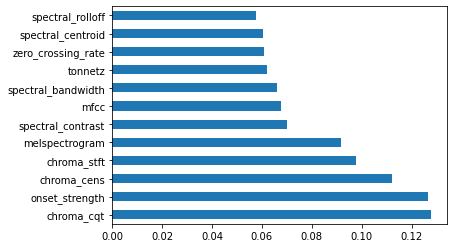

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_pandas,y_pandas)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_pandas.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

# **Running SVM on all set of features** (5 fold)

In [ ]:
from itertools import combinations
n_features = X.shape[1]

def get_X_as_per_features(X, features_array):
    new_X = X[:,features_array[0]:features_array[0]+1]
    for i in range(1, len(features_array)):
      feature_no = features_array[i]
      temp = X[:,feature_no:feature_no+1]
      new_X = np.concatenate((new_X, temp), 1)
    
    return new_X


In [ ]:
X_train = X

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
ans2 = []

for r in range(6, 8, 1 ):
    comb = list(combinations(list(range(n_features)),r))

    for c in comb:
      new_X = get_X_as_per_features(X_train, c)

      # defining model
      model = make_pipeline(PCA(len(c)), StandardScaler(), SVC(C = 0.7, gamma='auto', kernel = "rbf", break_ties = True))

      # define evaluation procedure
      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

      # evaluate model
      scores = cross_val_score(model, new_X, y, scoring='accuracy', cv=cv, n_jobs=4)

      # summarize performance
      mean_scores = mean(scores)

      print(c, ":", mean_scores)
      ans2.append([mean_scores, scores, c])


(0,) : 0.38264705882352945
(1,) : 0.29023809523809524
(2,) : 0.36236694677871145
(3,) : 0.3691736694677871
(4,) : 0.30700280112044825
(5,) : 0.2732913165266107
(6,) : 0.27182072829131654
(7,) : 0.27859943977591034
(8,) : 0.27183473389355745
(9,) : 0.2700980392156863
(10,) : 0.24666666666666667
(11,) : 0.26009803921568625
(0, 1) : 0.46983193277310925
(0, 2) : 0.5502941176470587
(0, 3) : 0.5503221288515407
(0, 4) : 0.4429411764705883
(0, 5) : 0.3942857142857143
(0, 6) : 0.414453781512605
(0, 7) : 0.4446778711484594
(0, 8) : 0.3825490196078431
(0, 9) : 0.4177450980392157
(0, 10) : 0.46985994397759107
(0, 11) : 0.3976890756302521
(1, 2) : 0.5049719887955182
(1, 3) : 0.4814985994397759
(1, 4) : 0.40432773109243697
(1, 5) : 0.36910364145658264
(1, 6) : 0.38586834733893555
(1, 7) : 0.35067226890756303
(1, 8) : 0.35563025210084037
(1, 9) : 0.3590756302521009
(1, 10) : 0.39252100840336135
(1, 11) : 0.3809663865546219
(2, 3) : 0.49000000000000005
(2, 4) : 0.4865266106442577
(2, 5) : 0.4462745098

In [ ]:
# arranging them in the sorted order
ans2.sort(key = lambda x:x[0], reverse=True)

for i in ans2:
  if len(i[2]) == 6:
    print(i)
  

[0.6828991596638655, array([0.675     , 0.6302521 , 0.69747899, 0.66386555, 0.74789916]), (0, 1, 2, 3, 4)]
[0.6828711484593839, array([0.69166667, 0.62184874, 0.7394958 , 0.68067227, 0.68067227]), (0, 1, 2, 6, 11)]
[0.6762324929971989, array([0.64166667, 0.66386555, 0.70588235, 0.75630252, 0.61344538]), (0, 1, 2, 4, 9)]
[0.6761764705882354, array([0.675     , 0.67226891, 0.7394958 , 0.67226891, 0.62184874]), (0, 1, 2, 7, 10)]
[0.6744677871148459, array([0.69166667, 0.68907563, 0.70588235, 0.64705882, 0.63865546]), (0, 1, 2, 4, 10)]
[0.6743977591036414, array([0.73333333, 0.60504202, 0.71428571, 0.67226891, 0.64705882]), (0, 1, 2, 4, 5)]
[0.6712044817927171, array([0.63333333, 0.73109244, 0.66386555, 0.68067227, 0.64705882]), (0, 1, 2, 4, 6)]
[0.6711904761904762, array([0.64166667, 0.70588235, 0.63865546, 0.71428571, 0.65546218]), (0, 2, 4, 6, 11)]
[0.6694957983193277, array([0.65      , 0.64705882, 0.65546218, 0.66386555, 0.73109244]), (0, 1, 2, 4, 8)]
[0.6678151260504201, array([0.65 

In [ ]:
ans2

[[0.6828991596638655,
  array([0.675     , 0.6302521 , 0.69747899, 0.66386555, 0.74789916]),
  (0, 1, 2, 3, 4)],
 [0.6828711484593839,
  array([0.69166667, 0.62184874, 0.7394958 , 0.68067227, 0.68067227]),
  (0, 1, 2, 6, 11)],
 [0.6762324929971989,
  array([0.64166667, 0.66386555, 0.70588235, 0.75630252, 0.61344538]),
  (0, 1, 2, 4, 9)],
 [0.6761764705882354,
  array([0.675     , 0.67226891, 0.7394958 , 0.67226891, 0.62184874]),
  (0, 1, 2, 7, 10)],
 [0.6744817927170869,
  array([0.68333333, 0.68067227, 0.64705882, 0.64705882, 0.71428571]),
  (0, 1, 2, 4)],
 [0.6744677871148459,
  array([0.69166667, 0.68907563, 0.70588235, 0.64705882, 0.63865546]),
  (0, 1, 2, 4, 10)],
 [0.6743977591036414,
  array([0.73333333, 0.60504202, 0.71428571, 0.67226891, 0.64705882]),
  (0, 1, 2, 4, 5)],
 [0.6712044817927171,
  array([0.63333333, 0.73109244, 0.66386555, 0.68067227, 0.64705882]),
  (0, 1, 2, 4, 6)],
 [0.6711904761904762,
  array([0.64166667, 0.70588235, 0.63865546, 0.71428571, 0.65546218]),
  (

# **Running Gradient boosting on all set of features**

In [ ]:
from itertools import combinations
n_features = X.shape[1]

def get_X_as_per_features(X, features_array):
    new_X = X[:,features_array[0]:features_array[0]+1]
    for i in range(1, len(features_array)):
      feature_no = features_array[i]
      temp = X[:,feature_no:feature_no+1]
      new_X = np.concatenate((new_X, temp), 1)
    
    return new_X


In [ ]:
X_train = X

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
ans3 = []

for r in range(n_features, 10, -1 ):
    comb = list(combinations(list(range(n_features)),r))

    for c in comb:
      new_X = get_X_as_per_features(X_train, c)

      # defining model
      model = GradientBoostingClassifier(n_estimators = 100)

      # define evaluation procedure
      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

      # evaluate model
      scores = cross_val_score(model, new_X, y, scoring='accuracy', cv=cv, n_jobs=4)

      # summarize performance
      mean_scores = mean(scores)

      print(c, ":", mean_scores)
      ans3.append([mean_scores, scores, c])
      
      


(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11) : 0.6746078431372549
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10) : 0.6761344537815127
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11) : 0.6509243697478991
(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11) : 0.6292857142857142
(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11) : 0.6745098039215686
(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11) : 0.6442577030812325
(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11) : 0.6811484593837536
(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11) : 0.6794817927170869
(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11) : 0.6660784313725491
(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11) : 0.6710364145658263
(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11) : 0.6594817927170868
(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11) : 0.6525630252100841
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11) : 0.6308403361344538


In [ ]:
# arranging them in the sorted order
ans3.sort(key = lambda x:x[0], reverse=True)
ans3

[[0.6879411764705883,
  array([0.675     , 0.66386555, 0.63865546, 0.73109244, 0.73109244]),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)]]

# **Running KNN on all set of features**

In [ ]:
from itertools import combinations
n_features = X.shape[1]

def get_X_as_per_features(X, features_array):
    new_X = X[:,features_array[0]:features_array[0]+1]
    for i in range(1, len(features_array)):
      feature_no = features_array[i]
      temp = X[:,feature_no:feature_no+1]
      new_X = np.concatenate((new_X, temp), 1)
    
    return new_X


In [ ]:
X_train = X

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
ans = []

for r in range(6, 8, 1 ):
    comb = list(combinations(list(range(n_features)),r))

    for c in comb:
      new_X = get_X_as_per_features(X_train, c)

      # defining model
      model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7, n_jobs=4))

      # define evaluation procedure
      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

      # evaluate model
      scores = cross_val_score(model, new_X, y, scoring='accuracy', cv=cv, n_jobs=4)

      # summarize performance
      mean_scores = mean(scores)

      print(c, ":", mean_scores)
      ans.append([mean_scores, scores, c])


(0, 1, 2, 3, 4, 5) : 0.6409523809523809
(0, 1, 2, 3, 4, 6) : 0.6460364145658264
(0, 1, 2, 3, 4, 7) : 0.6442296918767507
(0, 1, 2, 3, 4, 8) : 0.637563025210084
(0, 1, 2, 3, 4, 9) : 0.637549019607843
(0, 1, 2, 3, 4, 10) : 0.6139775910364146
(0, 1, 2, 3, 4, 11) : 0.6291736694677871
(0, 1, 2, 3, 5, 6) : 0.6039775910364146
(0, 1, 2, 3, 5, 7) : 0.6276190476190475
(0, 1, 2, 3, 5, 8) : 0.6040056022408964
(0, 1, 2, 3, 5, 9) : 0.6225070028011205
(0, 1, 2, 3, 5, 10) : 0.60906162464986
(0, 1, 2, 3, 5, 11) : 0.6107282913165266
(0, 1, 2, 3, 6, 7) : 0.6291596638655463
(0, 1, 2, 3, 6, 8) : 0.6224089635854342
(0, 1, 2, 3, 6, 9) : 0.5973389355742298
(0, 1, 2, 3, 6, 10) : 0.6106162464985995
(0, 1, 2, 3, 6, 11) : 0.5972829131652662
(0, 1, 2, 3, 7, 8) : 0.6308403361344537
(0, 1, 2, 3, 7, 9) : 0.6224509803921567
(0, 1, 2, 3, 7, 10) : 0.6175070028011205
(0, 1, 2, 3, 7, 11) : 0.6409243697478991
(0, 1, 2, 3, 8, 9) : 0.6124229691876751
(0, 1, 2, 3, 8, 10) : 0.6073949579831932
(0, 1, 2, 3, 8, 11) : 0.60561624649

KeyboardInterrupt: ignored

In [ ]:
# arranging them in the sorted order
ans.sort(key = lambda x:x[0], reverse=True)

for i in ans:
  if len(i[2]) == 6:
    print(i)

[0.681204481792717, array([0.68333333, 0.73109244, 0.6302521 , 0.66386555, 0.69747899]), (0, 1, 2, 4, 9, 11)]
[0.672843137254902, array([0.65833333, 0.64705882, 0.65546218, 0.73109244, 0.67226891]), (0, 1, 2, 4, 6, 7)]
[0.6677871148459383, array([0.66666667, 0.67226891, 0.67226891, 0.66386555, 0.66386555]), (0, 1, 2, 4, 7, 10)]
[0.6627731092436975, array([0.65      , 0.66386555, 0.71428571, 0.66386555, 0.62184874]), (0, 1, 2, 4, 7, 9)]
[0.6595378151260505, array([0.575     , 0.65546218, 0.65546218, 0.7394958 , 0.67226891]), (0, 1, 2, 4, 6, 11)]
[0.6594117647058824, array([0.65      , 0.66386555, 0.6302521 , 0.67226891, 0.68067227]), (0, 1, 2, 4, 10, 11)]
[0.6559243697478991, array([0.725     , 0.64705882, 0.64705882, 0.61344538, 0.64705882]), (0, 1, 2, 4, 8, 10)]
[0.6527030812324931, array([0.64166667, 0.71428571, 0.68907563, 0.63865546, 0.57983193]), (0, 1, 2, 4, 9, 10)]
[0.6526750700280113, array([0.65833333, 0.59663866, 0.65546218, 0.68067227, 0.67226891]), (0, 1, 2, 4, 6, 9)]
[0.65

In [ ]:
# arranging them in the sorted order
ans.sort(key = lambda x:x[0], reverse=True)
ans

[[0.657703081232493,
  array([0.66666667, 0.69747899, 0.63865546, 0.66386555, 0.62184874]),
  (0, 1, 2, 4, 10)],
 [0.6526050420168067,
  array([0.7       , 0.60504202, 0.61344538, 0.65546218, 0.68907563]),
  (0, 1, 2, 4, 6)],
 [0.652563025210084,
  array([0.725     , 0.63865546, 0.59663866, 0.68907563, 0.61344538]),
  (0, 1, 2, 9, 11)],
 [0.6510364145658263,
  array([0.63333333, 0.64705882, 0.64705882, 0.64705882, 0.68067227]),
  (0, 1, 2, 4, 8)],
 [0.6492577030812324,
  array([0.69166667, 0.59663866, 0.64705882, 0.62184874, 0.68907563]),
  (0, 1, 2, 4, 7)],
 [0.6478151260504201,
  array([0.55      , 0.64705882, 0.64705882, 0.68067227, 0.71428571]),
  (0, 1, 2, 4, 5)],
 [0.6443697478991597,
  array([0.6       , 0.70588235, 0.62184874, 0.64705882, 0.64705882]),
  (0, 1, 2, 4, 9)],
 [0.644313725490196,
  array([0.63333333, 0.62184874, 0.68907563, 0.63865546, 0.63865546]),
  (0, 1, 2, 7, 11)],
 [0.6410364145658263,
  array([0.58333333, 0.63865546, 0.63865546, 0.69747899, 0.64705882]),
  (

# **5 fold Cross validation**

In [ ]:
# bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedBaggingClassifier

# define model
model = BalancedBaggingClassifier(n_estimators = 50)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=4)
# summarize performance
print("accuracy in all folds:", scores)
print('Mean accuracy: %.3f' % mean(scores))

accuracy in all folds: [0.69166667 0.57142857 0.63865546 0.72268908 0.68907563]
Mean accuracy: 0.663


In [ ]:
# bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# define model
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7, n_jobs=4))

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=4)
# summarize performance
print("accuracy in all folds:", scores)
print('Mean accuracy: %.3f' % mean(scores))

accuracy in all folds: [0.55833333 0.67226891 0.61344538 0.67226891 0.64705882]
Mean accuracy: 0.633


In [ ]:
# bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# define model
model = make_pipeline(StandardScaler(), SVC(C = 5, gamma='auto', kernel = "rbf", break_ties = True))

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=4)
# summarize performance
#print("accuracy in all folds:", scores)
print('Mean accuracy: %.3f' % mean(scores))

Mean accuracy: 0.698


In [ ]:
# bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.neural_network import MLPClassifier


# define model
model = MLPClassifier(random_state=1, max_iter=500)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

# evaluate model
scores = cross_val_score(model, X_pca, y, scoring='accuracy', cv=cv, n_jobs=4)
# summarize performance
print("accuracy in all folds:", scores)
print('Mean accuracy: %.3f' % mean(scores))

accuracy in all folds: [0.64166667 0.65546218 0.65546218 0.63865546 0.67226891]
Mean accuracy: 0.653


In [ ]:
# bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# define model
model = make_pipeline(GradientBoostingClassifier(n_estimators = 100))

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=4)
# summarize performance
print("accuracy in all folds:", scores)
print('Mean accuracy: %.3f' % mean(scores))

accuracy in all folds: [0.725      0.7394958  0.60504202 0.7394958  0.67226891]
Mean accuracy: 0.696


In [ ]:
# bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# define model
model = make_pipeline(StandardScaler(), LogisticRegression())

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=4)
# summarize performance
print("accuracy in all folds:", scores)
print('Mean accuracy: %.3f' % mean(scores))

accuracy in all folds: [0.73333333 0.63865546 0.68067227 0.68907563 0.64705882]
Mean accuracy: 0.678


# **Confusion Matrix**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [ ]:
labels = ["Bollywood Rap", "Ghazal", "Garhwali", "Bhajan", "Bollywood Romantic", "Sufi", "Bhojpuri"] 


In [ ]:
from itertools import combinations
n_features = X.shape[1]

def get_X_as_per_features(X, features_array):
    new_X = X[:,features_array[0]:features_array[0]+1]
    for i in range(1, len(features_array)):
      feature_no = features_array[i]
      temp = X[:,feature_no:feature_no+1]
      new_X = np.concatenate((new_X, temp), 1)
    
    return new_X

0.7166666666666667


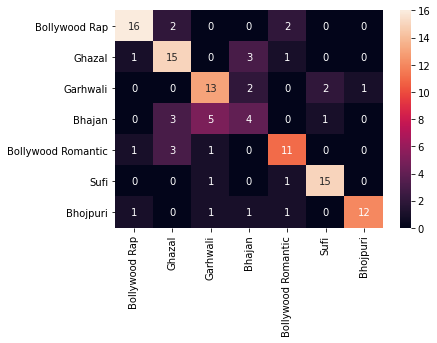

In [ ]:
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


model = make_pipeline(PCA(9), StandardScaler(), SVC(C = 5, gamma='auto', kernel = "rbf", break_ties = True))

new_X_train = get_X_as_per_features(X_train, (0, 1, 2, 3, 4, 6, 8, 10, 11))
new_X_test = get_X_as_per_features(X_test, (0, 1, 2, 3, 4, 6, 8, 10, 11))

model.fit(new_X_train, y_train)

predicted = model.predict(new_X_test)

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, annot=True, xticklabels = labels, yticklabels = labels)


In [ ]:
# saving the model
import pickle
model_name = "svm.pickle"

file_name = open("/content/drive/My Drive/iqb/saved_models/" + model_name, 'wb') 

pickle.dump(model, file_name)

0.6583333333333333


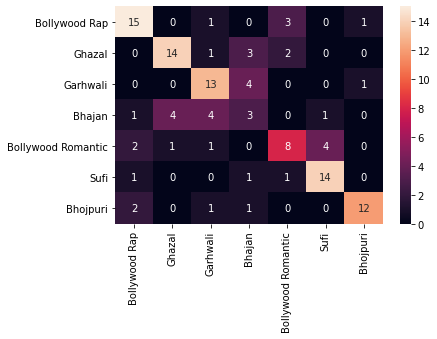

In [ ]:
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier



model = GradientBoostingClassifier(n_estimators = 100)

new_X_train = get_X_as_per_features(X_train, (0, 1, 2, 4, 7, 8, 9, 11))
new_X_test = get_X_as_per_features(X_test, (0, 1, 2, 4, 7, 8, 9, 11))

model.fit(new_X_train, y_train)

predicted = model.predict(new_X_test)

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, annot=True, xticklabels = labels, yticklabels = labels)


In [ ]:
# saving the model
import pickle
model_name = "Gradient_boosting.pickle"

file_name = open("/content/drive/My Drive/iqb/saved_models/" + model_name, 'wb') 

pickle.dump(model, file_name)

0.6666666666666666


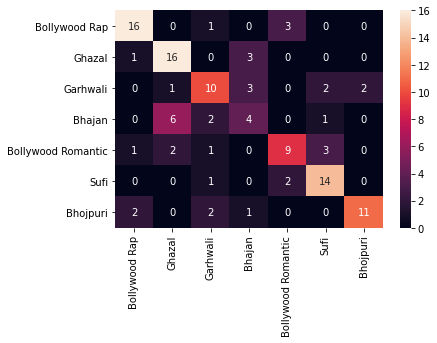

In [ ]:
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier



model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7, n_jobs=4))

new_X_train = get_X_as_per_features(X_train, (0, 1, 2, 3, 4, 6, 7, 8, 11))
new_X_test = get_X_as_per_features(X_test, (0, 1, 2, 3, 4, 6, 7, 8, 11))

model.fit(new_X_train, y_train)

predicted = model.predict(new_X_test)

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, annot=True, xticklabels = labels, yticklabels = labels)


In [ ]:
# saving the model
import pickle
model_name = "kNN.pickle"

file_name = open("/content/drive/My Drive/iqb/saved_models/" + model_name, 'wb') 

pickle.dump(model, file_name)